In [1]:
"""
This notebook visualizes the edge ratios for ImageNet images.
"""

'\nThis notebook visualizes the edge ratios for ImageNet images.\n'

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys, os
sys.path.append(os.path.abspath(".."))   # one level up from notebook/
print(os.path.abspath(".."))


/BS/data_mani_compress/work/thesis/thesis


In [4]:
from data.utils.dataloaders import get_imagenet_dataloader
imagenet = get_imagenet_dataloader(split="val")

/BS/data_mani_compress/work/miniforge3/envs/dgm_geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/BS/data_mani_compress/work/miniforge3/envs/dgm_geometry/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 64 worker processes in total. Our suggested max number of worker in current system is 20, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [5]:
# check the edge ratios for imagenet
with open("../heuristic_baseline/imageNet_edge_ratios/imageNet_edge_ratios.json", "r") as f:
    edge_ratios = json.load(f)

In [6]:
arr = np.array(edge_ratios)

# indices of the 10 smallest
lowest_indices = np.argsort(arr)[:10]

# indices of the 10 largest
highest_indices = np.argsort(arr)[-10:]

print("Lowest indices:", lowest_indices)
print("Highest indices:", highest_indices)

Lowest indices: [36642 21871  7579 29070  5531 41209 43394 34334 29874 28209]
Highest indices: [11708 32073 22777 37282  8606 17271 25426 25872 27926  6635]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4329139..2.3088455].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9637812..1.2979523].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6051416].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.4199566].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.5702832].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8044444..1.5296686].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9466565.

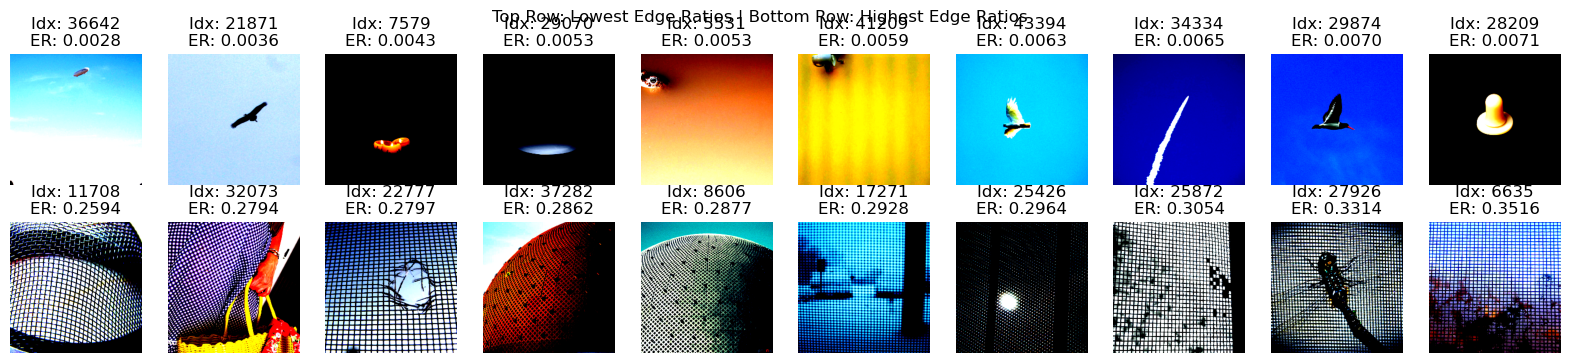

In [ ]:
# visualize the lowest and highest indices
fig, axes = plt.subplots(2, 10, figsize=(20, 4))
for i, idx in enumerate(lowest_indices):
    axes[0, i].imshow(imagenet.dataset[idx][0].permute(1, 2, 0))
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Idx: {idx}\nER: {arr[idx]:.4f}")
for i, idx in enumerate(highest_indices):
    axes[1, i].imshow(imagenet.dataset[idx][0].permute(1, 2, 0))
    axes[1, i].axis('off')
    axes[1, i].set_title(f"Idx: {idx}\nER: {arr[idx]:.4f}")
plt.suptitle("Top Row: Lowest Edge Ratios | Bottom Row: Highest Edge Ratios")
plt.show()  